In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Baca dataset
df = pd.read_csv('/content/creditcard.csv', encoding="ISO-8859-1", sep=",")
num_rows, num_cols = df_info.shape

# Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {num_rows}")
print(f"Jumlah kolom: {num_cols}")

# Menampilkan nama kolom dan tipe datanya
print("\nStruktur Kolom:")
df_dtypes = df # Membaca hanya sebagian data
print(df_dtypes.dtypes)

# Menampilkan 5 baris pertama
df.head()

Jumlah baris: 284807
Jumlah kolom: 31

Struktur Kolom:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Membaca metadata tanpa memuat seluruh file ke memori (berguna untuk file besar)
df_info = df  # Hanya membaca metadata
num_rows, num_cols = df_info.shape

# Menghitung distribusi kelas (fraud vs. non-fraud)
fraud_distribution = df["Class"].value_counts(normalize=True) * 100  # Persentase

# Menghitung statistik deskriptif
summary_stats = df.describe()

print('Jumlah Baris: ', num_rows)
print('Jumlah Kolom: ', num_cols)
print(fraud_distribution)
print(summary_stats)

Jumlah Baris:  284807
Jumlah Kolom:  31
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604

<ipython-input-49-bae2fece0945>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette=["blue", "red"])


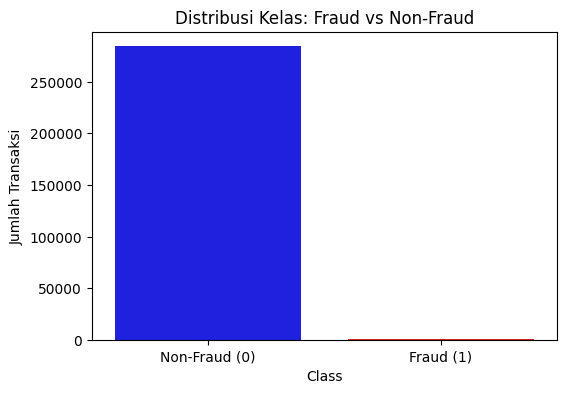

In [ ]:
# Visualisasi distribusi kelas
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class"], palette=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.title("Distribusi Kelas: Fraud vs Non-Fraud")
plt.xlabel("Class")
plt.ylabel("Jumlah Transaksi")
plt.show()

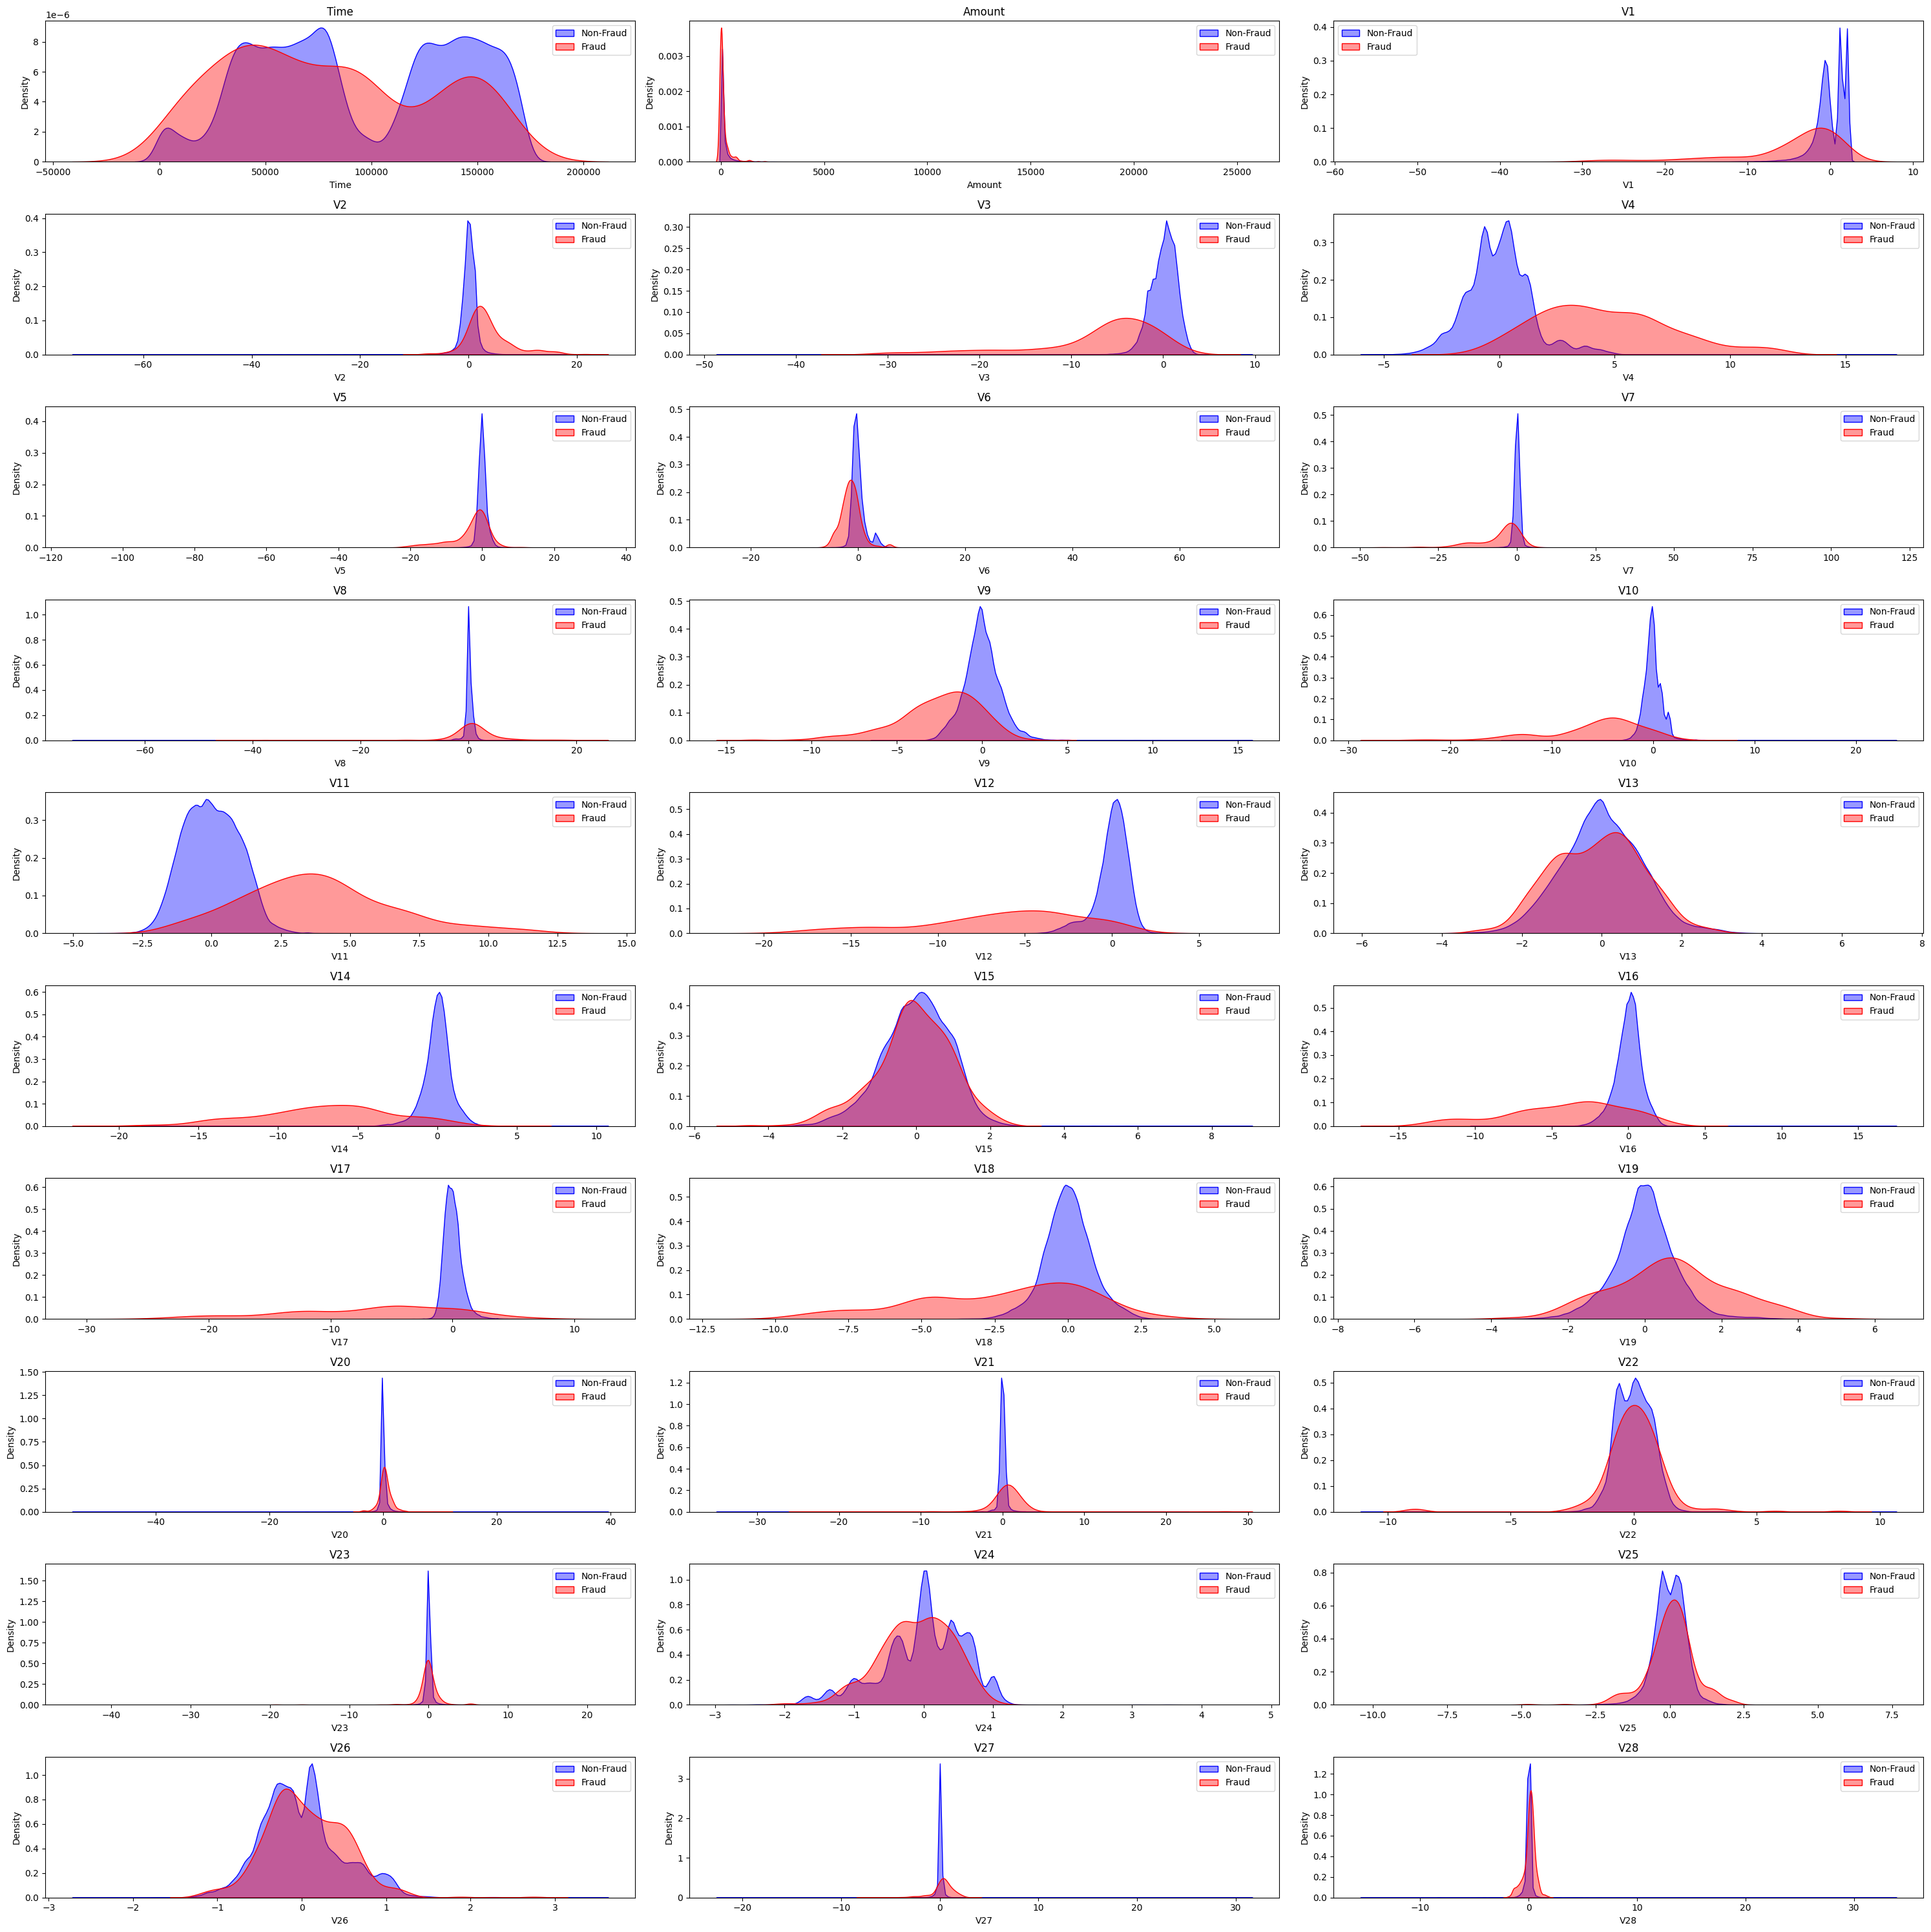

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi fitur numerik (contoh fitur Time, Amount, dan beberapa fitur V)
num_features = ["Time", "Amount"] + [f"V{i}" for i in range(1, 29)]  # Subset fitur

plt.figure(figsize=(30, 30))
for i, feature in enumerate(num_features, 1):
    plt.subplot(10, 3, i)
    sns.kdeplot(df[df["Class"] == 0][feature], label="Non-Fraud", fill=True, color="blue", alpha=0.4)
    sns.kdeplot(df[df["Class"] == 1][feature], label="Fraud", fill=True, color="red", alpha=0.4)
    plt.title(f"{feature}")
    plt.legend()

plt.tight_layout()
plt.show()

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

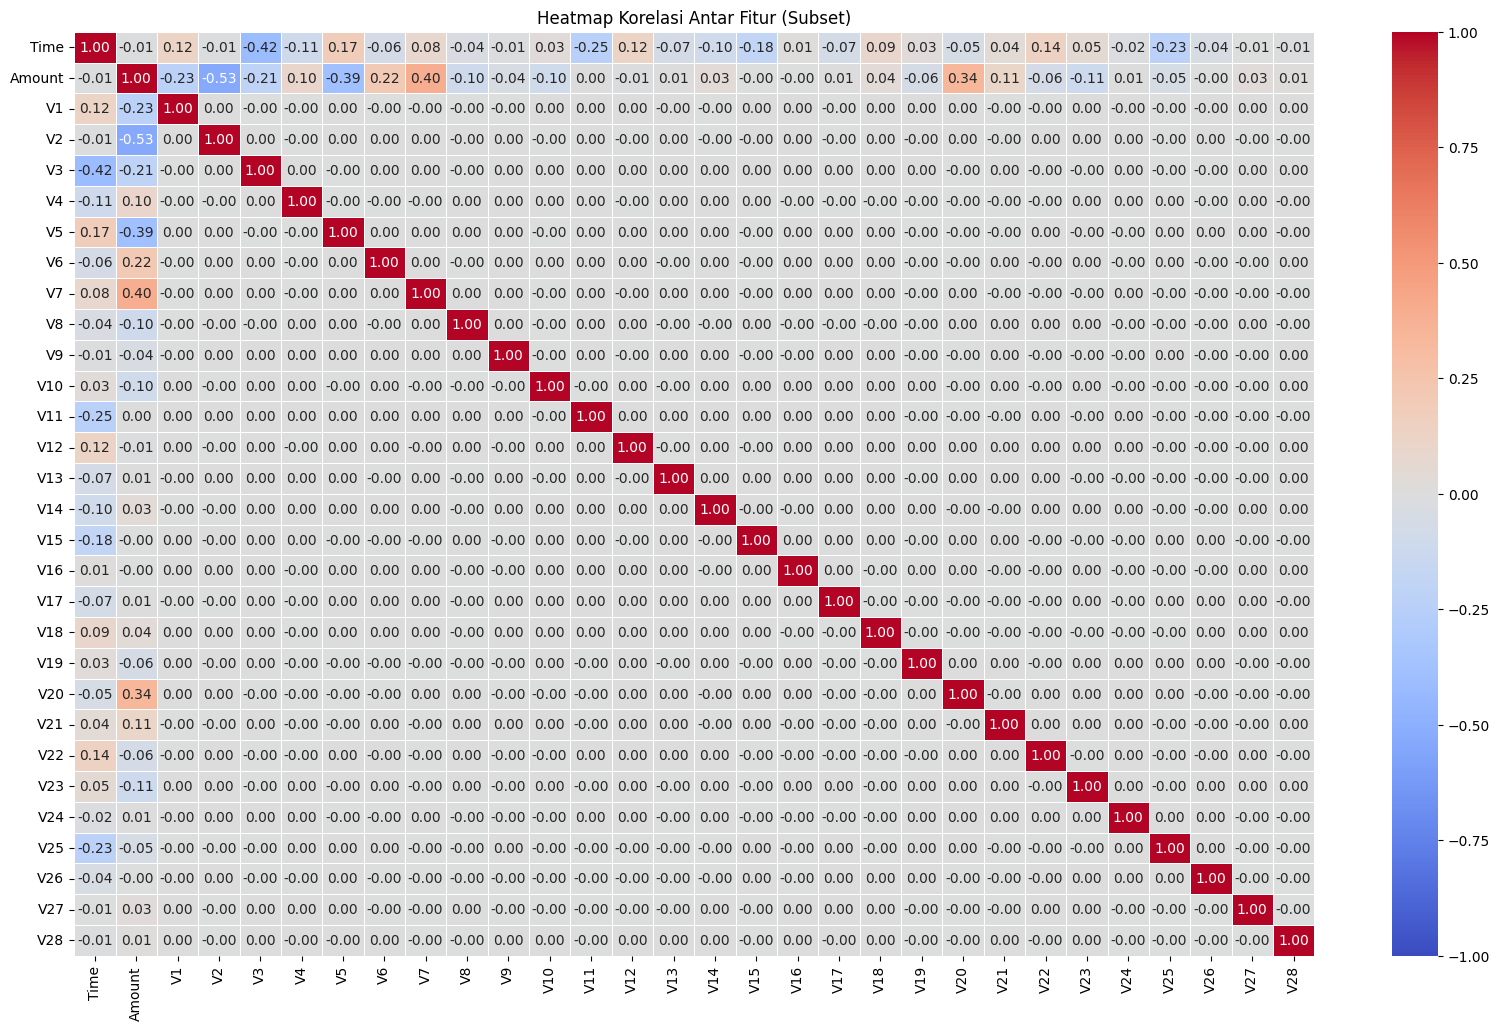

In [ ]:
# Mengambil subset fitur untuk korelasi (Time, Amount, dan beberapa fitur V)
selected_features = ["Time", "Amount"] + [f"V{i}" for i in range(1, 29)]  # Menggunakan V1-V5 saja

# Menghitung matriks korelasi hanya untuk fitur yang dipilih
correlation_subset = df[selected_features].corr()

# Visualisasi heatmap korelasi dengan subset fitur
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_subset, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur (Subset)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Menangani nilai yang hilang (jika ada)
df_cleaned = df.dropna()  # Menghapus baris dengan nilai NaN

# 2. Memisahkan fitur dan label
Xx = df_cleaned.drop(columns=["Class"])  # Semua fitur kecuali target
y = df_cleaned["Class"]  # Label target

# 3. Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Menangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)



# 5. Membagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Mengecek distribusi kelas setelah oversampling
y_train.value_counts(), y_test.value_counts()

(Class
 0    227452
 1    227452
 Name: count, dtype: int64,
 Class
 1    56863
 0    56863
 Name: count, dtype: int64)

In [ ]:
# 3. Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Menangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 5. Membagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 6. Melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Memprediksi hasil pada data uji
y_pred = rf_model.predict(X_test)

# 8. Evaluasi model menggunakan precision, recall, dan F1-score
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56863\n           1       1.00      1.00      1.00     56863\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n',
 array([[56849,    14],
        [    0, 56863]]))

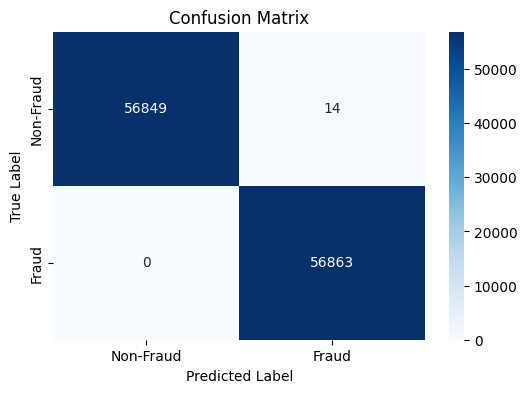

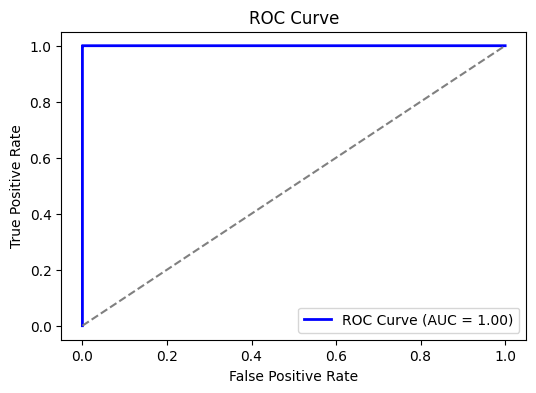

<ipython-input-55-6de00438a660>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


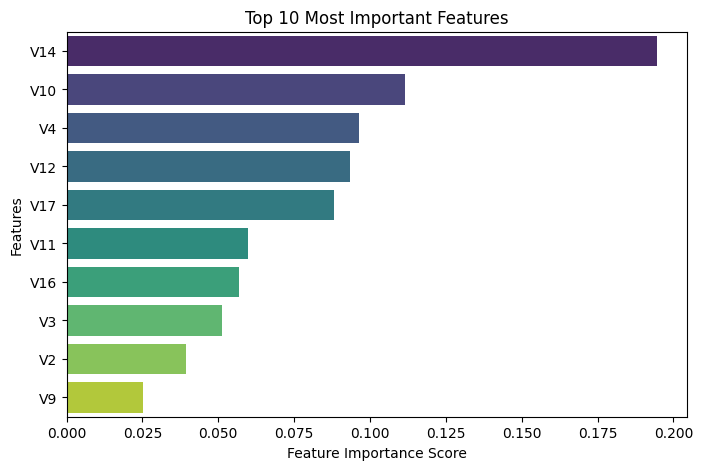

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56863\n           1       1.00      1.00      1.00     56863\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n'

In [ ]:
from sklearn.metrics import roc_curve, auc
# 1. Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2. Menghitung dan menampilkan ROC Curve
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1 (Fraud)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Analisis fitur yang paling berpengaruh dalam prediksi
feature_importances = pd.Series(rf_model.feature_importances_, index=df.columns[:-1])
top_features = feature_importances.nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features")
plt.show()

classification_rep